In [ ]:
import glob

from IPython.display import display
from PIL import Image

from viroc.dataset import dataset_path
from viroc.imaging import visualize_bounding_box
from viroc.models import YOLOModel


In [2]:
dataset_path

PosixPath('/home/noah/.cache/kaggle/datasets/binh234/ccpd-preprocess/CCPD2019/ccpd_base')

In [3]:
imgs = glob.glob(str(dataset_path / "*.jpg"))

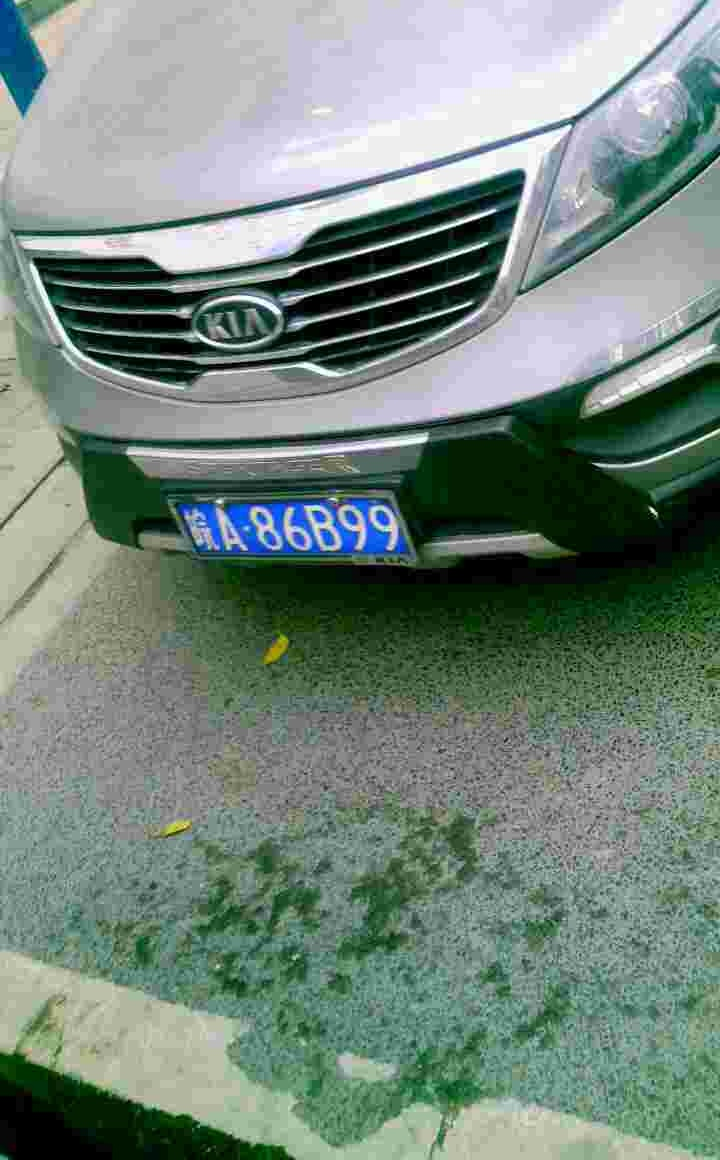

In [4]:
img = imgs[10]

Image.open(img)

In [5]:
model = YOLOModel()

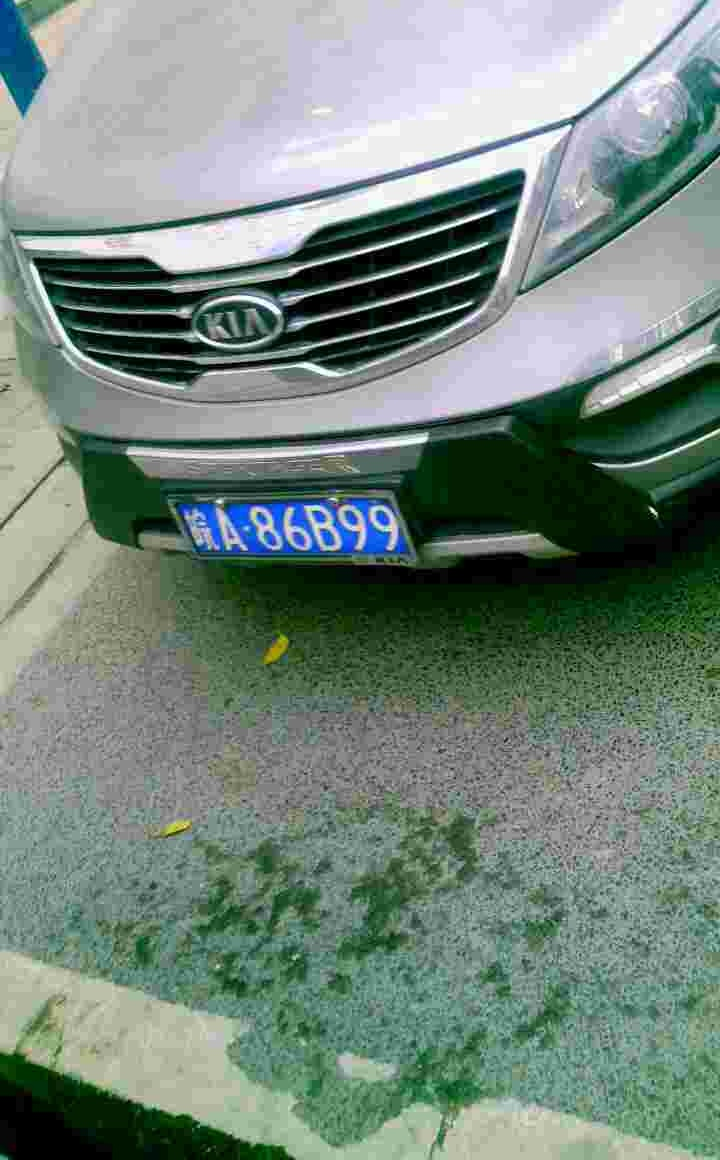

Inference results shape: (1, 25200, 6)
Results: [[[7.1733646e+00 1.9768791e+00 1.6406197e+01 1.2057945e+01 5.2452087e-06
   9.9998426e-01]
  [1.4117598e+01 2.9052315e+00 2.2365572e+01 6.9721565e+00 2.0623207e-05
   9.9998498e-01]
  [1.8479801e+01 2.0327682e+00 2.0535536e+01 6.3987784e+00 1.3470650e-05
   9.9998808e-01]
  ...
  [5.6901630e+02 6.2028662e+02 2.7767255e+02 2.0466417e+02 1.1920929e-05
   9.9998474e-01]
  [5.9084326e+02 6.1875079e+02 2.1211104e+02 1.9213664e+02 1.4305115e-05
   9.9998450e-01]
  [6.1436151e+02 6.1470154e+02 2.5287758e+02 2.3357912e+02 1.0371208e-05
   9.9998581e-01]]]


In [6]:
# Load an image
pil_image = Image.open(img)
original_size = pil_image.size
display(pil_image)

# Make inference request
results = model.predict(pil_image)
print(f"Inference results shape: {results.shape}")
print(f"Results: {results}")

In [7]:
bb = model.get_bounding_box(pil_image)

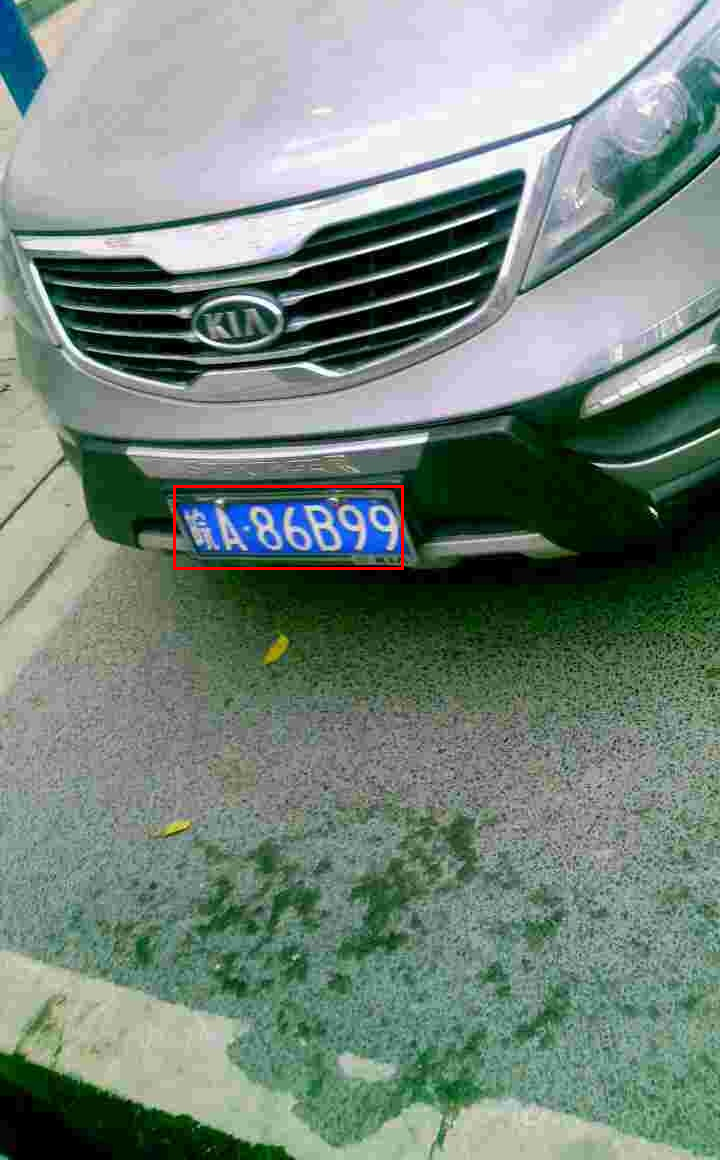

In [8]:
visualize_bounding_box(pil_image.copy(), bb)